<a href="https://colab.research.google.com/github/giginar/Machinelearning/blob/main/yigit_kucukcinar_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab-1

This exercise involves the Boston housing data set. For more info about the dataset visit:

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

*You may use as many code and text cells for your solution.*


### 1) Load the dataset

How many rows are in this data set? 

How many columns? 

What do the rows and columns represent?

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [77]:
df = pd.read_csv("boston_house_prices.csv")
print("There are " + str(df.shape[1]) + " columns." + "\n" + "There are " + str(df.shape[0]) + " rows.")
df.info()

There are 14 columns.
There are 506 rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Rows are samples recorded.
Columns are labeled data.

### 2) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

Hint: Use Seaborn.pairplot()

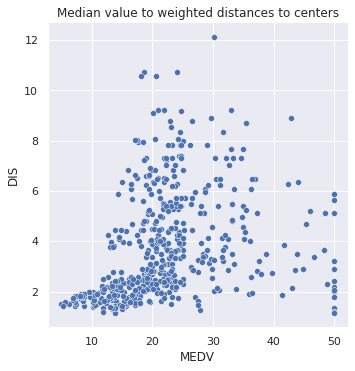

In [31]:
sns.pairplot(x_vars='MEDV', y_vars='DIS', data=df, height=5)
plt.title("Median value to weighted distances to centers")
plt.show()

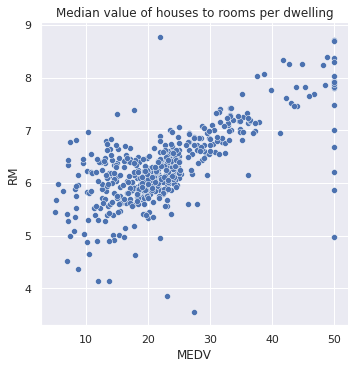

In [5]:
sns.pairplot(x_vars='MEDV', y_vars='RM', data=df, height=5)
plt.title("Median value of houses to rooms per dwelling")
plt.show()

When the median value of the houses rises, both distances to the city centers and rooms per dwelling are positively and strongly rising, but distance has a logaritmically increasing where rooms per dwelling have a linearly increase. There are some outliers in both plots.

### 3) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

Hint: Create separate scatter plots of CRIM on y axis, and other variables on x axis

*You may create as many code and text cells for your answer below*

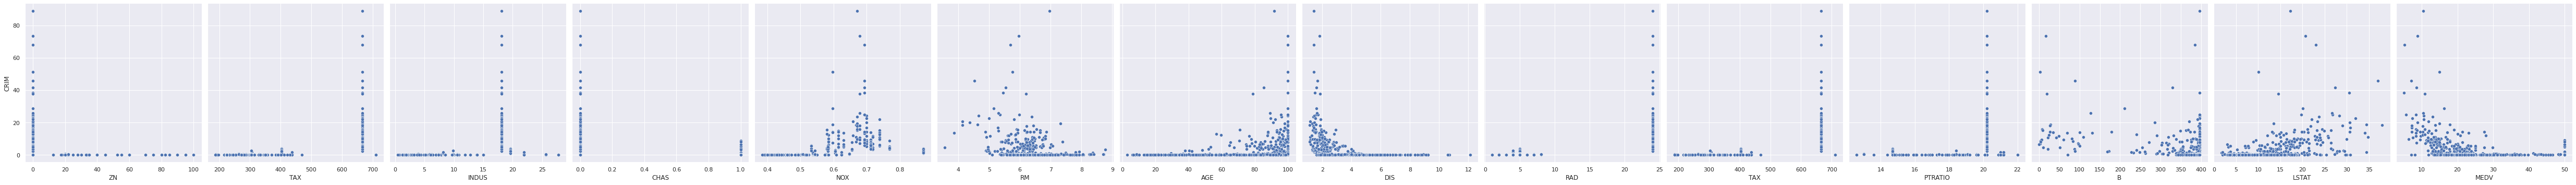

In [6]:
xVars = ["ZN","TAX","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
sns.pairplot(df, x_vars=xVars , y_vars="CRIM", height=5)
plt.show()

Comments

DIS and CRIM have a relationship, closer to centrum more crime occurs.
LSTAT and  CRIM have a relationship, it looks like if the status of the population lower the crime gets higher.
MEDV and CRIM also have a relationship, when value of the houses rises crime-rate drops.


### 4) Do any of the suburbs of Boston appear to have particularly high crime rates, how many possible outliers for crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

Hint: You may create histograms for all of these variables. For CRIM, you may count the observations above 1.5*inter quantile range

*use as many code and text cells as you like*

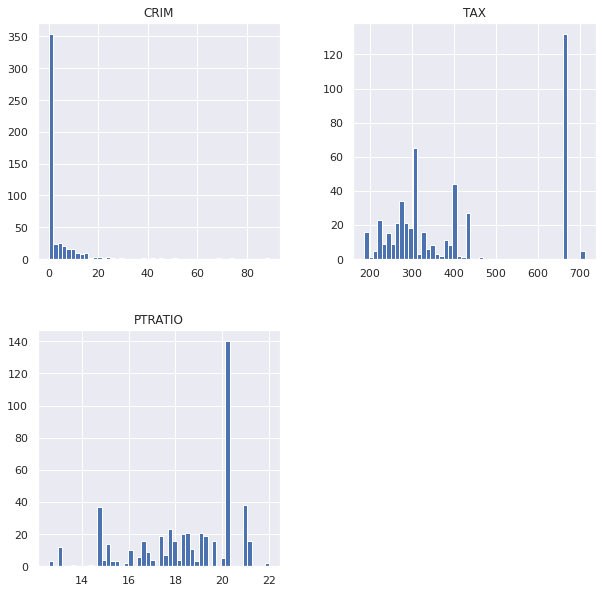

In [81]:
df.hist(figsize=(10,10),bins=50,column=["CRIM","TAX","PTRATIO"])
plt.show()

In [8]:
q1 = df['CRIM'].quantile(0.25)
q3 = df['CRIM'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print("Crime rate outliers:" , len(df[df['CRIM']>upper_bound]) + len(df[df['CRIM']<lower_bound]))

q1 = df['TAX'].quantile(0.25)
q3 = df['TAX'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print("Tax rate outliers:" , len(df[df['TAX']>upper_bound]) + len(df[df['TAX']<lower_bound]))

q1 = df['PTRATIO'].quantile(0.25)
q3 = df['PTRATIO'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print("Pupil-teacher ratios outliers:" ,len(df[df['PTRATIO']>upper_bound]) + len(df[df['PTRATIO']<lower_bound]))

Crime rate outliers: 66
Tax rate outliers: 0
Pupil-teacher ratios outliers: 15


Comments

Crime rate looks like really low in most of the suburbs (350 nos).
Tax rate is really variable between suburbs. there is huge gap between high tax rate suburbs and lower ones, it looks like incomerate is not well divided between the population.
PTRatio mostly varies between %10 to 20. Looks well distrubuted.

### 5) How many of the suburbs in this dataset bound to Charles River?

In [9]:
len(df[(df["CHAS"]==1)])

35

### 6) What is the median pupil-teacher ratio among the towns in this data set?

In [10]:
df["PTRATIO"].median()

19.05

### 7)  Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [79]:
dfNew = df.groupby("MEDV").median()
dfNew

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,,
5.0,38.351800,0.0,18.10,0.0,0.6930,5.4530,100.00,1.4896,24.0,666.0,20.20,396.900,30.590
5.2,67.920800,0.0,18.10,0.0,0.6930,5.6830,100.00,1.4254,24.0,666.0,20.20,384.970,22.980
5.6,25.046100,0.0,18.10,0.0,0.6930,5.9870,100.00,1.5888,24.0,666.0,20.20,396.900,26.770
6.3,9.916550,0.0,18.10,0.0,0.6930,5.8520,77.80,1.5004,24.0,666.0,20.20,338.160,29.970
7.0,22.964735,0.0,22.92,0.0,0.6510,4.9665,99.15,1.7068,14.0,688.5,20.15,216.160,30.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.7,0.298190,0.0,6.20,0.0,0.5040,7.6860,17.00,3.3751,8.0,307.0,17.40,377.510,3.920
48.3,0.331470,0.0,6.20,0.0,0.5070,8.2470,70.40,3.6519,8.0,307.0,17.40,378.950,3.950
48.5,0.035100,95.0,2.68,0.0,0.4161,7.8530,33.20,5.1180,4.0,224.0,14.70,392.780,3.810



Comments

While median value of the houses is 5000, PTRATIO and LSTAT have maximum values. They have inverse relation. So the pupil teacher ratio is really high in this neighbourhood as well as population status. Most probably these are the reasons that the value is low, not a popular area.

### 8) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [12]:
len(df[df['RM']>7])

64

In [13]:
len(df[df['RM']>8])

13

Comments

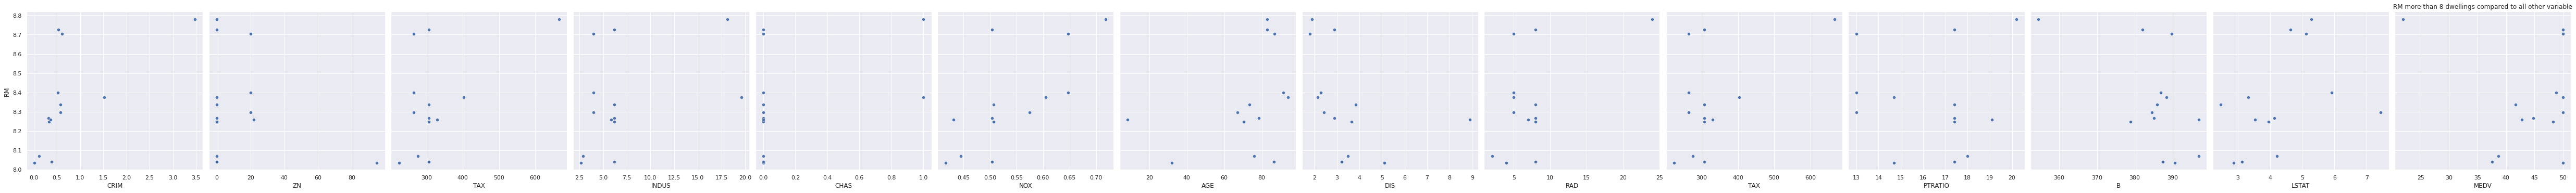

In [21]:
df2 = df[df['RM']>8]
xVars = ["CRIM","ZN","TAX","INDUS","CHAS","NOX","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
sns.pairplot(x_vars=xVars, y_vars='RM', data=df2, height=5)
plt.title("RM more than 8 dwellings compared to all other variable")
plt.show()

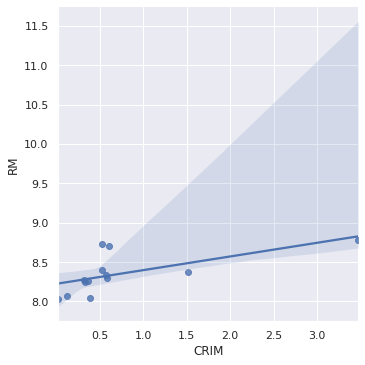

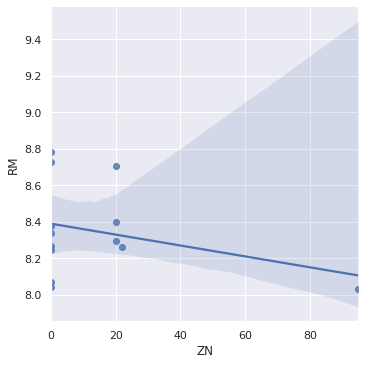

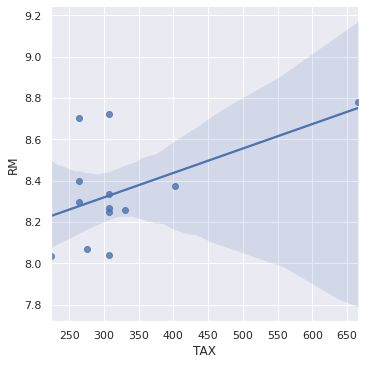

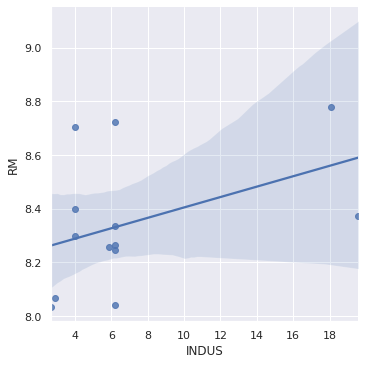

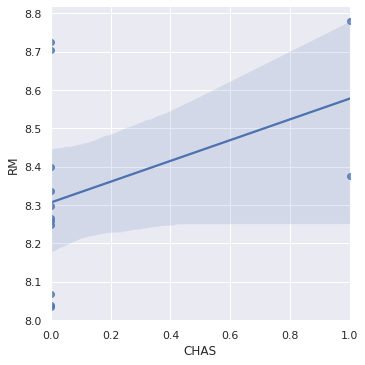

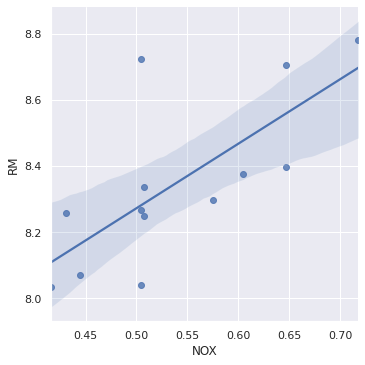

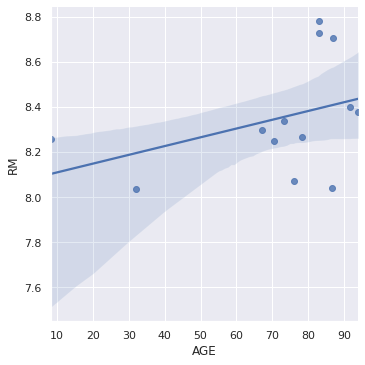

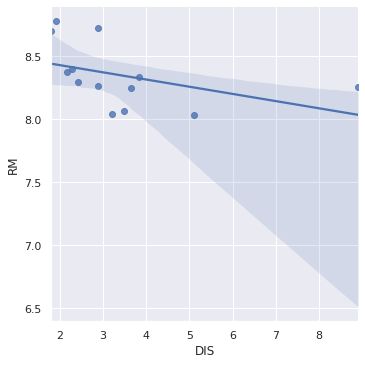

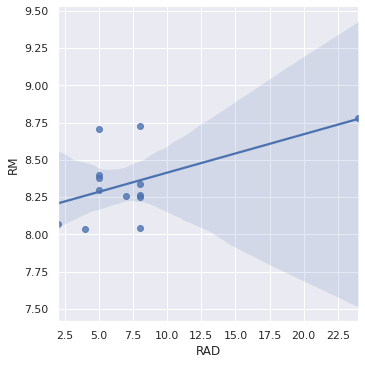

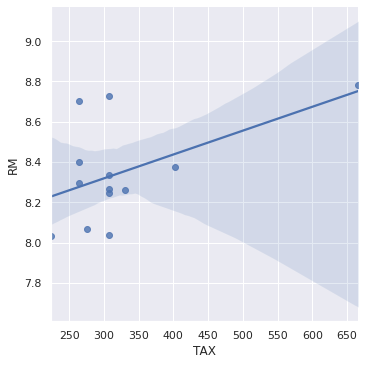

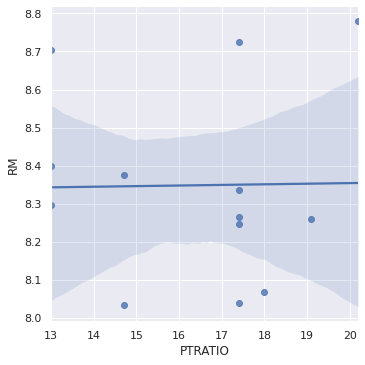

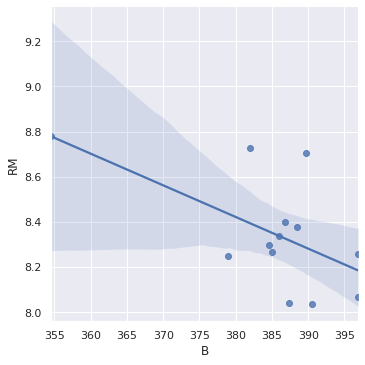

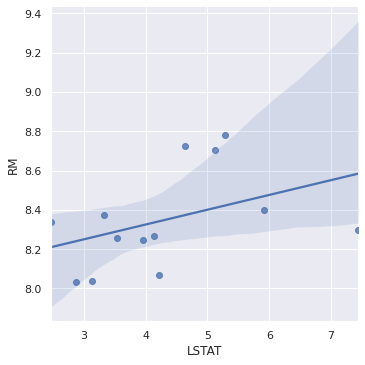

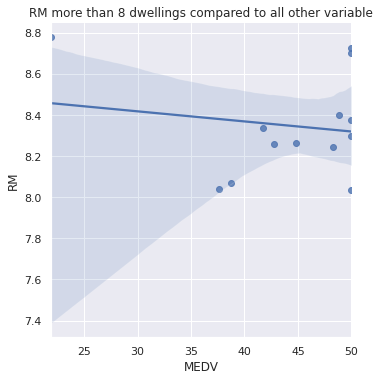

In [29]:
df2 = df[df['RM']>8]
xVars = ["CRIM","ZN","TAX","INDUS","CHAS","NOX","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
for i in xVars:
  sns.lmplot(x=i, y='RM', data=df2, height=5)

plt.title("RM more than 8 dwellings compared to all other variable")
plt.show()
#I also plotted with "lmplot" to see if there is a linear relation between the variables.

Crimrates(CRIM) and room per dwelling (RM) have a relation, very strong and looks like linear relationship.
Same kind of relationship also applies between RM and status of the population(LSTAT) too.